In [1]:

import tensorflow as tf
import numpy as np
import h5py
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Configure Keras to use GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

2024-09-17 15:02:05.422719: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-17 15:02:05.456123: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 15:02:05.456150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 15:02:05.456170: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 15:02:05.462409: I tensorflow/core/platform/cpu_feature_g

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks

class DataLoader:
    def __init__(self, h5_filename):
        self.h5_filename = h5_filename
        self.images, self.centers = self.load_data()

    def load_data(self):
        with h5py.File(self.h5_filename, 'r') as f:
            images = np.array(f['images'])
            centers = np.array(f['centers_training'])
        return images, centers

    def plot_image_with_centers(self, image_index=None):
        if image_index is None:
            image_index = np.random.randint(0, len(self.images))

        image = self.images[image_index]
        centers = self.centers[image_index]

        plt.imshow(image, cmap='gray')
        valid_centers = centers[centers[:, 0] == 1]
        for center in valid_centers:
            plt.scatter(center[1], center[2], c='red', marker='x')  # center[1] is x and center[2] is y
        plt.title('Image with Valid Centers Marked')
        plt.colorbar()
        plt.show()

    @staticmethod
    def sort_centers(centers):
        return centers[np.lexsort((centers[:, 0], centers[:, 1]))]

    def normalize_data(self):
        normalized_images = self.images / np.max(self.images)
        sorted_centers = np.array([self.sort_centers(image_centers[:, 1:]) for image_centers in self.centers])
        normalized_centers = sorted_centers / 64
        normalized_midpoints = tf.expand_dims(normalized_centers, axis=1)
        return normalized_images, normalized_midpoints.numpy()

    def split_data(self, train_size=0.82, random_state=42):
        normalized_images, normalized_midpoints_np = self.normalize_data()
        return train_test_split(normalized_images, normalized_midpoints_np, train_size=train_size, random_state=random_state)


class ModelBuilder:
    def __init__(self, input_shape=(64, 64, 1), num_classes=5, num_coordinates=2, learning_rate=3e-5, weights_path=None):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.num_coordinates = num_coordinates
        self.learning_rate = learning_rate
        self.model = self.build_model()

        # Load weights if a path is provided
        if weights_path is not None:
            self.model.load_weights(weights_path)

        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        # self.optimizer =tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    def build_model(self):
        x_input = layers.Input(shape=self.input_shape)
        
        x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x_input)
        x = layers.MaxPool2D()(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
        
        x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
        # # x = layers.Dropout(0.1)(x)
        # x = layers.BatchNormalization()(x)
        
        # x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.Dropout(0.01)(x)
        # x = layers.BatchNormalization()(x)
        
        
        # x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # x = layers.Dropout(0.03)(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # x = layers.Dropout(0.02)(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # # x = layers.Dropout(0.1)(x)
        # x = layers.BatchNormalization()(x)
        
        # x = layers.Conv2D(256, kernel_size=5, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # # x = layers.Dropout(0.2)(x)
        # x = layers.BatchNormalization()(x)
        x = layers.Dense(512, activation='relu')(x)
        x = layers.Flatten()(x)
        
        
        x_midpoints = layers.Dense(self.num_classes * self.num_coordinates, activation='sigmoid', name='x_midpoints')(x)
        x_midpoints_reshape = layers.Reshape((-1, self.num_classes, self.num_coordinates), name='x_midpoints_reshape')(x_midpoints)
        
        return tf.keras.models.Model(x_input, x_midpoints_reshape)

    def compile_model(self, loss_function):
        self.model.compile(optimizer=self.optimizer, loss=loss_function)

    def train_model(self, train_dataset, val_dataset, epochs, callbacks_list):
        history = self.model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, callbacks=callbacks_list)
        return history







Bigger arch

In [ ]:
# x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x_input)
        # x = layers.MaxPool2D()(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
        
        # x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Dropout(0.2)(x)
        
        # x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Dropout(0.2)(x)
        
        # x = layers.Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Dropout(0.3)(x)
        # x = layers.Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Dropout(0.3)(x)
        
        # x = layers.Conv2D(512, kernel_size=5, padding='same', activation='relu')(x)
        # x = layers.MaxPool2D()(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Dropout(0.3)(x)
        
        # x = layers.Flatten()(x)

In [3]:
# Initialize the DataLoader with the path to the HDF5 file
h5_filename = '/home/m3-learning/Documents/Research Data/Electron Detection/Data Generated/Fixed hits/5 only/30KFixed_Mixed_5.h5'




data_loader = DataLoader(h5_filename)

# Load images and centers
images, centers = data_loader.load_data()


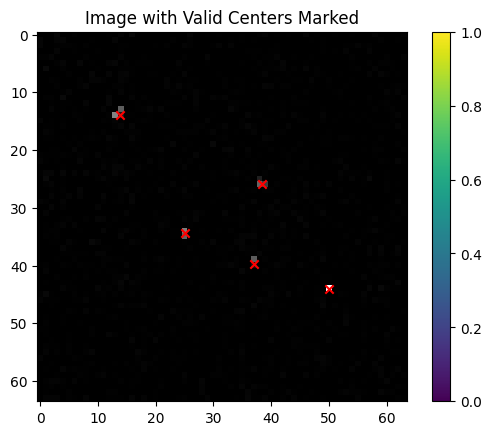

In [4]:

# Optional: Plot a random image with valid centers marked
data_loader.plot_image_with_centers()


In [5]:
# Normalize the data and split it into training and validation sets
train_images, val_images, train_midpoints, val_midpoints = data_loader.split_data()

# Check the shape of the datasets
print(f'Train Images: {train_images.shape}, Train Midpoints: {train_midpoints.shape}')
print(f'Validation Images: {val_images.shape}, Validation Midpoints: {val_midpoints.shape}')


2024-09-17 15:02:19.301336: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21372 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6


Train Images: (24600, 64, 64), Train Midpoints: (24600, 1, 5, 2)
Validation Images: (5400, 64, 64), Validation Midpoints: (5400, 1, 5, 2)


In [6]:
# Convert the data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_midpoints))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_midpoints))

# Batch and shuffle the datasets
batch_size = 200
train_dataset = train_dataset.shuffle(buffer_size=2000, reshuffle_each_iteration=True).batch(batch_size)
val_dataset = val_dataset.shuffle(buffer_size=2000).batch(batch_size)


In [7]:
# Initialize the ModelBuilder
model_builder = ModelBuilder()

# Build the model
model = model_builder.build_model()

# Display the model architecture
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       7385

In [8]:
# Define the learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='min', min_lr=7e-15
)

In [9]:
model_builder.compile_model(loss_function=tf.keras.losses.MeanSquaredError())

In [10]:
# Train the model
history = model_builder.train_model(
    train_dataset, val_dataset, epochs=250, callbacks_list=[lr_scheduler]
)


Epoch 1/250


2024-09-17 15:02:40.135760: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-09-17 15:02:40.436916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-09-17 15:02:43.933483: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3431ae70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-17 15:02:43.933504: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-17 15:02:43.937990: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-17 15:02:44.012339: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled clus

123/123 [==============================] - 36s 195ms/step - loss: 0.0494 - val_loss: 0.0957 - lr: 3.0000e-05
Epoch 2/250
123/123 [==============================] - 24s 194ms/step - loss: 0.0328 - val_loss: 0.0757 - lr: 3.0000e-05
Epoch 3/250
123/123 [==============================] - 24s 196ms/step - loss: 0.0284 - val_loss: 0.0465 - lr: 3.0000e-05
Epoch 4/250
123/123 [==============================] - 24s 194ms/step - loss: 0.0254 - val_loss: 0.0344 - lr: 3.0000e-05
Epoch 5/250
123/123 [==============================] - 24s 195ms/step - loss: 0.0230 - val_loss: 0.0225 - lr: 3.0000e-05
Epoch 6/250
123/123 [==============================] - 24s 195ms/step - loss: 0.0211 - val_loss: 0.0203 - lr: 3.0000e-05
Epoch 7/250
123/123 [==============================] - 24s 196ms/step - loss: 0.0195 - val_loss: 0.0186 - lr: 3.0000e-05
Epoch 8/250
123/123 [==============================] - 24s 196ms/step - loss: 0.0180 - val_loss: 0.0178 - lr: 3.0000e-05
Epoch 9/250
123/123 [=======================

In [13]:
# model_builder.model.save('/home/m3-learning/Documents/Research Data/Electron Detection/Weights/Weights for Fixed/5 only/5_overfit.h5')
# loadedmodel = tf.keras.models.load_model('/home/m3-learning/Documents/Research Data/Electron Detection/Weights/Weights for Fixed/5 only/5_overfit.keras')

/home/m3-learning/anaconda3/envs/electrondetection/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


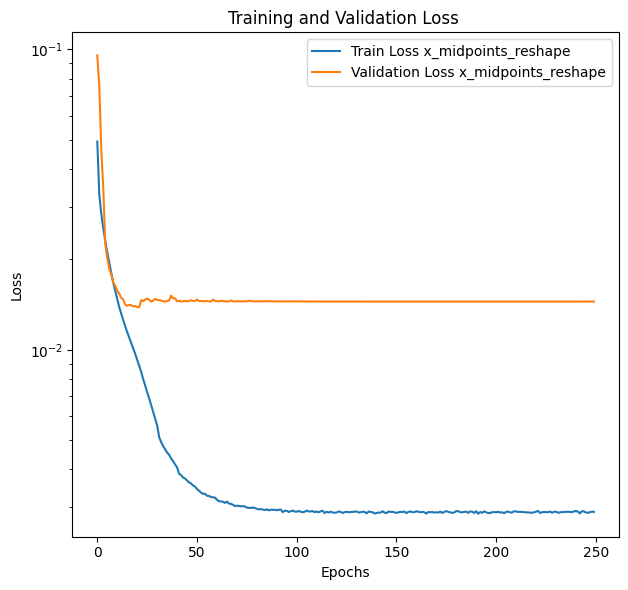

In [11]:



# Extract the losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']


train_loss_x_midpoints = history.history.get('x_midpoints_reshape_loss', train_loss)
val_loss_x_midpoints = history.history.get('val_x_midpoints_reshape_loss', val_loss)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2,1)
plt.plot(train_loss_x_midpoints, label='Train Loss x_midpoints_reshape')
plt.plot(val_loss_x_midpoints, label='Validation Loss x_midpoints_reshape')
plt.xlabel('Epochs')
plt.yscale('log')

plt.ylabel('Loss')
plt.title('Training and Validation Loss ')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the function for visualizing midpoints
def visualize_midpoints(image, midpoints, title="Predicted Midpoint Visualization"):
    """
    Visualizes midpoints on an image without using a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - title: The title of the plot.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    midpoints_np = midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title(title)

    # Plot midpoints directly, only if they are not (0, 0)
    for i, (x, y) in enumerate(midpoints_np):
        if x >= 3 and y >= 3:  # Only plot if the point is not (0, 0)
            plt.scatter(x, y, color='red', s=5)

    plt.show()

# Create the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_midpoints))
# val_dataset = val_dataset.batch(800)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_midpoints))
train_dataset = train_dataset.batch(800)

# Initialize lists to collect the data
all_images = []
all_true_midpoints = []
all_pred_midpoints = []

# Loop through each batch in the validation dataset, predict, and collect results
# for i, (data_batch, midpoints_batch) in enumerate(val_dataset):
for i, (data_batch, midpoints_batch) in enumerate(train_dataset):
    print(f"Processing batch {i + 1}, batch shape: {data_batch.shape}")
    
    # Get the model predictions
    predictions = model_builder.model.predict(data_batch)

    # Extend the lists to store data from each batch
    all_images.extend(data_batch.numpy())  # Store all images
    all_true_midpoints.extend(midpoints_batch.numpy())  # Store all true midpoints
    all_pred_midpoints.extend(predictions)  # Store all predicted midpoints

# Convert lists to arrays for easier indexing
all_images = np.array(all_images)
all_true_midpoints = np.array(all_true_midpoints)
all_pred_midpoints = np.array(all_pred_midpoints)


Processing batch 1, batch shape: (800, 64, 64)
25/25 [==============================] - 1s 9ms/step
Processing batch 2, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step
Processing batch 3, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step
Processing batch 4, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 8ms/step
Processing batch 5, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step
Processing batch 6, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step
Processing batch 7, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 8ms/step
Processing batch 8, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step
Processing batch 9, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step
Processing batch 10, batch shape: (800, 64, 64)
25/25 [==============================] - 0s 9ms/step

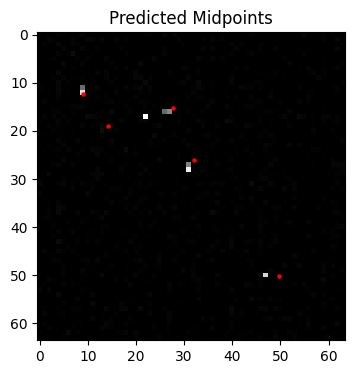

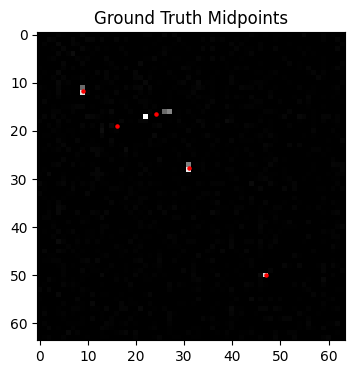

In [20]:
# Select an index to visualize from the entire dataset
index_to_visualize = np.random.randint(0, len(all_images))

# Visualize the selected image with predicted and true midpoints
visualize_midpoints(all_images[index_to_visualize], all_pred_midpoints[index_to_visualize, 0, :, :] * 64, title="Predicted Midpoints")
visualize_midpoints(all_images[index_to_visualize], all_true_midpoints[index_to_visualize, 0, :, :] * 64, title="Ground Truth Midpoints")

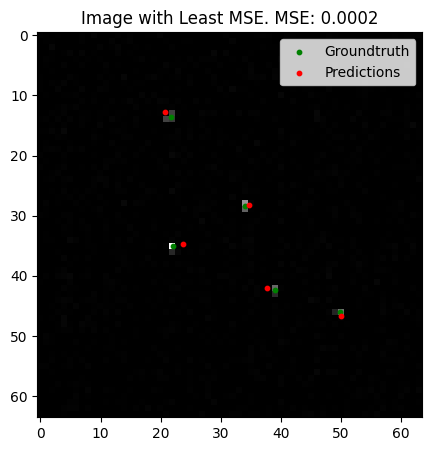

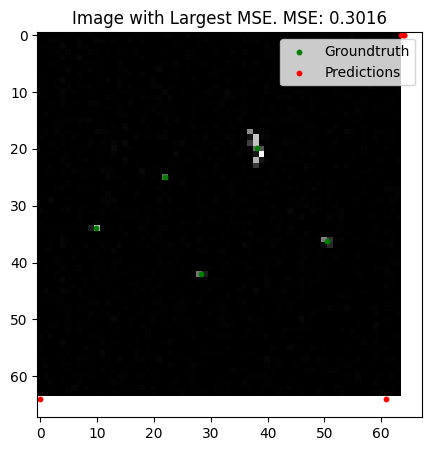

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables to track the min and max MSE
min_mse = float('inf')
max_mse = float('-inf')
min_mse_index = -1
max_mse_index = -1

# Loop through each prediction to calculate the MSE
for i in range(len(all_pred_midpoints)):
    mse = np.mean((all_pred_midpoints[i] - all_true_midpoints[i]) ** 2)
    
    if mse < min_mse:
        min_mse = mse
        min_mse_index = i
    
    if mse > max_mse:
        max_mse = mse
        max_mse_index = i


# Function to plot an image with its centers
def plot_image_with_centers(image, true_center, predicted_center, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(image.squeeze(), cmap='gray')  # Display the image

    # Plot the actual center (Groundtruth)
    plt.scatter(true_center[:, 0], true_center[:, 1], color='green', label='Groundtruth', s=10)

    # Plot the predicted center
    plt.scatter(predicted_center[:, 0], predicted_center[:, 1], color='red', label='Predictions', s=10)

    plt.title(title)
    plt.legend()
    plt.show()






# Plotting the image with the least MSE
plot_image_with_centers(all_images[min_mse_index],
                        all_true_midpoints[min_mse_index][0] * 64,  
                        all_pred_midpoints[min_mse_index][0] * 64,  
                        f'Image with Least MSE. MSE: {min_mse:.4f}')

# Plotting the image with the largest MSE
plot_image_with_centers(all_images[max_mse_index],
                        all_true_midpoints[max_mse_index][0] * 64, 
                        all_pred_midpoints[max_mse_index][0] * 64,  
                        f'Image with Largest MSE. MSE: {max_mse:.4f}')


